In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

len(train_data), len(test_data)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.83MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.46MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.88MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

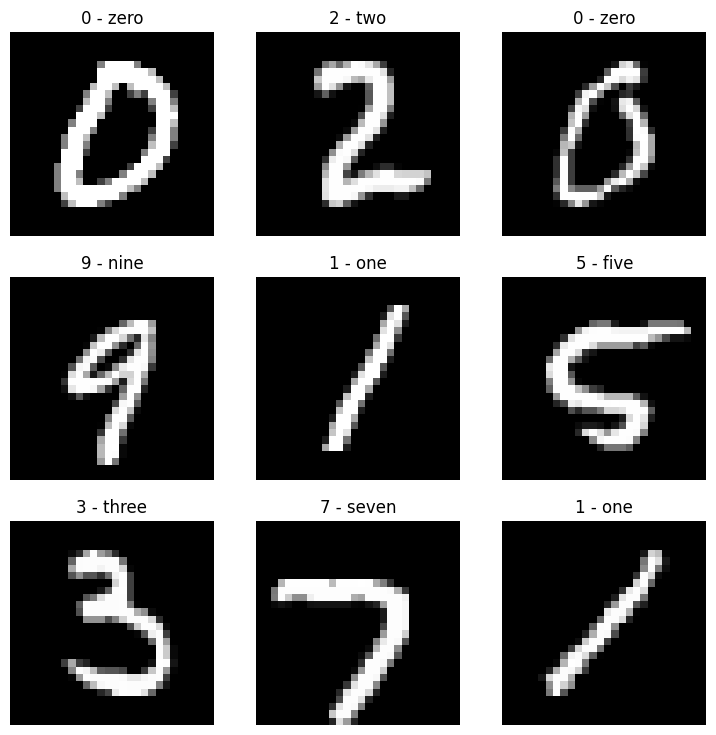

In [ ]:
# Plot more images
# torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=256,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a325b2bf310>,
 <torch.utils.data.dataloader.DataLoader at 0x7a325b39c490>)

In [ ]:
class MNISTModel(nn.Module):
  """
  CNN built to classify on the MNIST dataset
  """
  def __init__(self,
               in_features: int = 1,
               hidden_features: int = 16,
               out_features: int = 10):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_features,
                  out_channels=hidden_features,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_features),
        nn.Conv2d(in_channels=hidden_features,
                  out_channels=hidden_features,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_features),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_features,
                  out_channels=hidden_features,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_features),
        nn.Conv2d(in_channels=hidden_features,
                  out_channels=hidden_features,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_features),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_features * 7 * 7,
                  out_features=hidden_features * 7 * 7 * 2),
        nn.ReLU(),
        nn.Dropout(p=0.25),
        nn.Linear(in_features=hidden_features * 7 * 7 * 2,
                  out_features=hidden_features * 7 * 7),
        nn.ReLU(),
        nn.Dropout(p=0.25),
        nn.Linear(in_features=hidden_features * 7 * 7,
                  out_features=out_features)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
lr = 0.001
epochs = 10

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = MNISTModel(in_features=1,
                   hidden_features=16,
                   out_features=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=lr,
                            weight_decay=1e-4) # Weight Decay adds L2 regularization with a strength

In [ ]:
# Training
for epoch in range(epochs):
  total_loss = 0

  for (X, y) in train_dataloader:
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    total_loss += loss.item()

    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Gradient Clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    # Optimizer Step
    optimizer.step()

  if epoch % (epochs / 10) == 0:
    print(f"Epoch: {epoch + 1} | Loss: {total_loss / len(train_dataloader)}")

Epoch: 1 | Loss: 0.14406965308763245
Epoch: 2 | Loss: 0.0438815729038671
Epoch: 3 | Loss: 0.03511078883794711
Epoch: 4 | Loss: 0.026794588253238893
Epoch: 5 | Loss: 0.02191305593463612
Epoch: 6 | Loss: 0.018652067296058335
Epoch: 7 | Loss: 0.019443442318538957
Epoch: 8 | Loss: 0.017554951737823083
Epoch: 9 | Loss: 0.015654250277525823
Epoch: 10 | Loss: 0.015089173186719021


In [ ]:
total_test_loss = 0
total_test_acc = 0

for (X, y) in test_dataloader:
  X, y = X.to(device), y.to(device)

  # Forward pass
  y_pred = model(X) # Logits

  # Calculate the loss
  loss = loss_fn(y_pred, y)
  total_test_loss += loss.item()

  y_pred_probs = torch.softmax(y_pred, dim=1)
  y_pred_class = torch.argmax(y_pred_probs, dim=1)
  total_test_acc += (y_pred_class==y).sum().item() / len(y_pred)

print(f"Test Loss: {total_test_loss / len(test_dataloader)} | Test Acc: {total_test_acc / len(test_dataloader)}")

Test Loss: 0.03488176620601135 | Test Acc: 0.9903154952076677


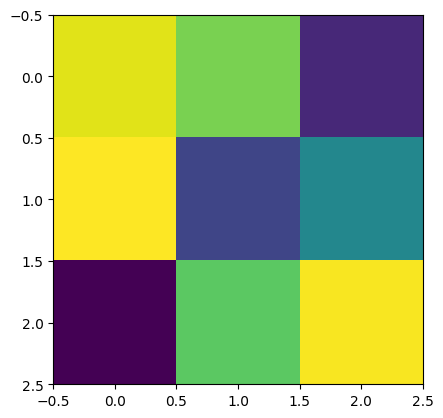

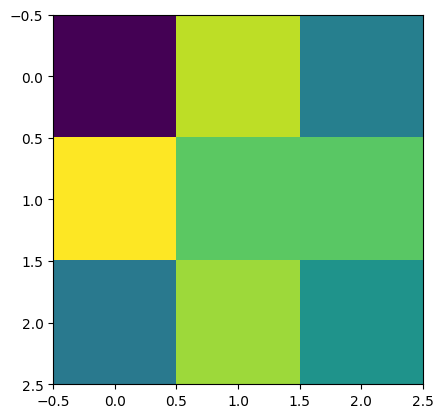

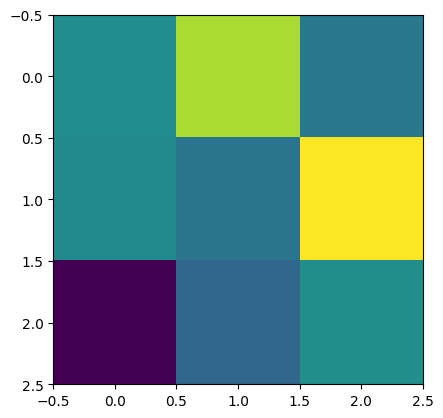

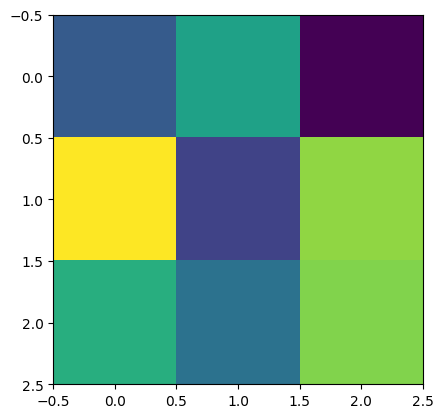

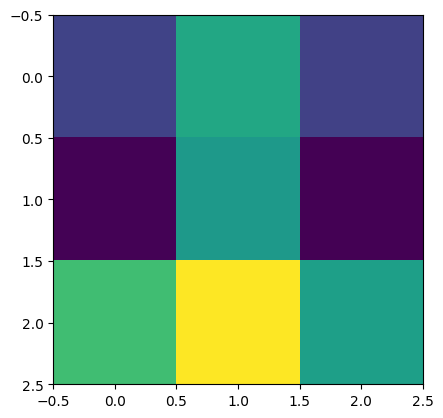

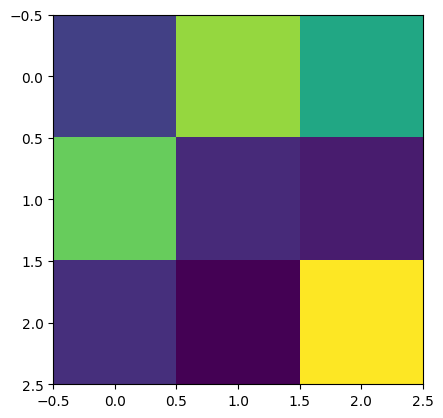

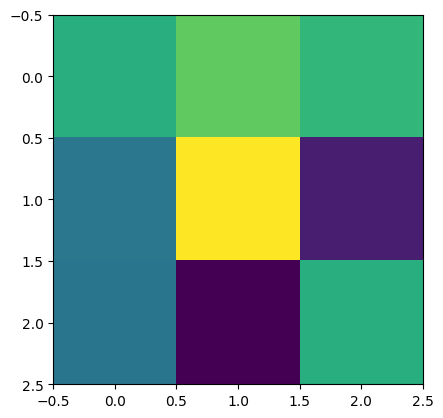

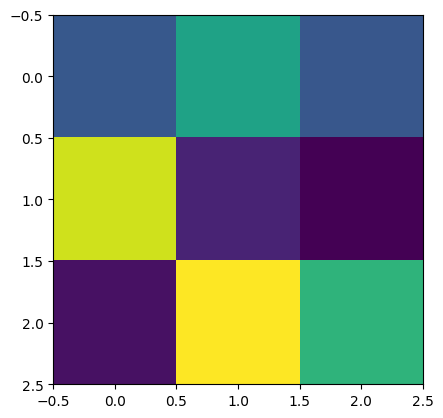

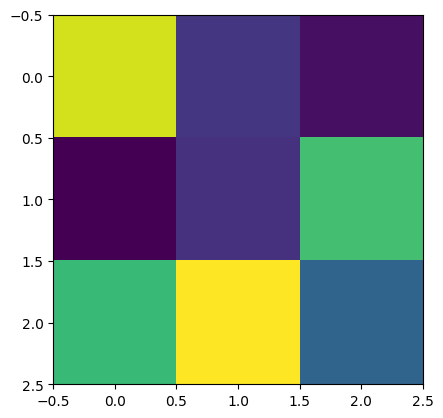

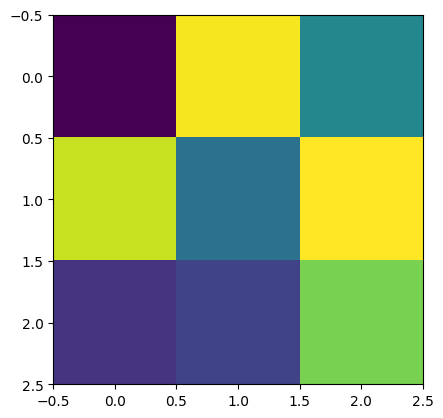

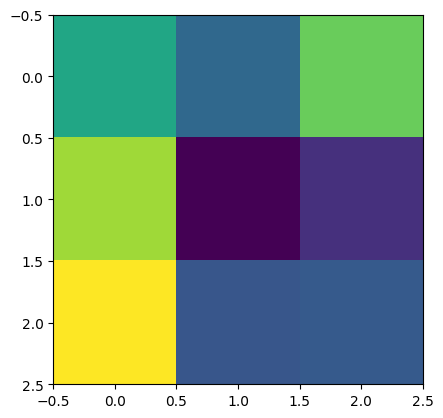

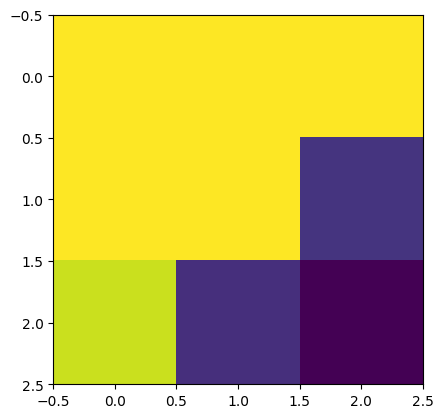

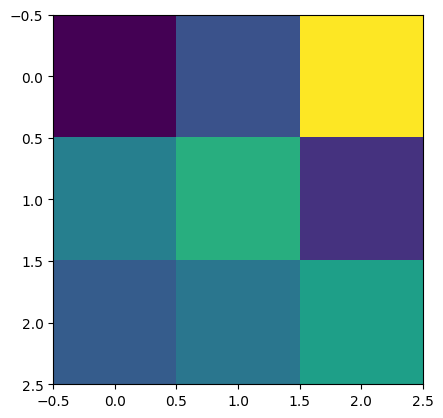

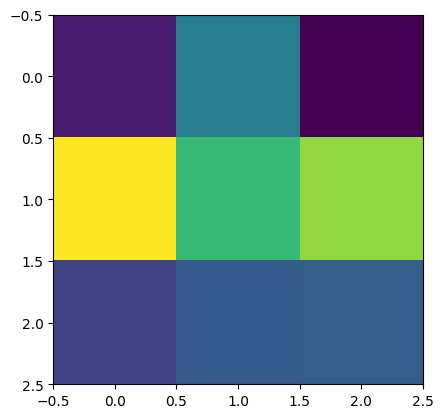

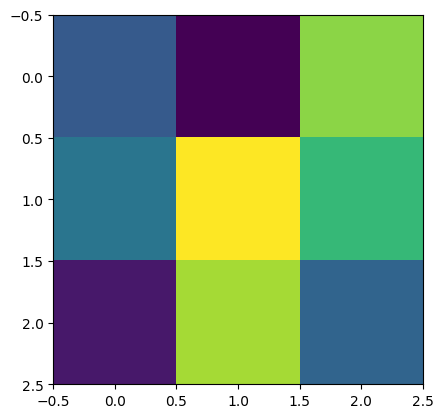

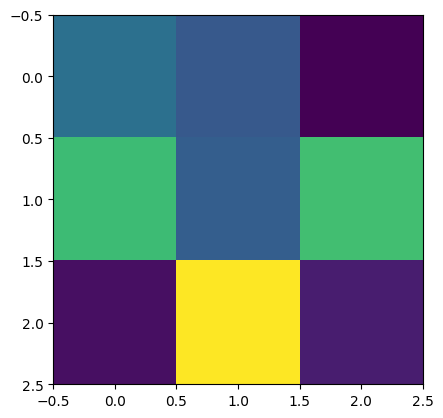

In [ ]:
import matplotlib.pyplot as plt

kernels = model.state_dict()['conv_block_1.0.weight'].cpu()

for kernel in kernels:
  plt.imshow(kernel.squeeze())
  plt.show()

In [ ]:
model.state_dict().keys()

odict_keys(['conv_block_1.0.weight', 'conv_block_1.0.bias', 'conv_block_1.2.weight', 'conv_block_1.2.bias', 'conv_block_1.2.running_mean', 'conv_block_1.2.running_var', 'conv_block_1.2.num_batches_tracked', 'conv_block_1.3.weight', 'conv_block_1.3.bias', 'conv_block_1.5.weight', 'conv_block_1.5.bias', 'conv_block_1.5.running_mean', 'conv_block_1.5.running_var', 'conv_block_1.5.num_batches_tracked', 'conv_block_2.0.weight', 'conv_block_2.0.bias', 'conv_block_2.2.weight', 'conv_block_2.2.bias', 'conv_block_2.2.running_mean', 'conv_block_2.2.running_var', 'conv_block_2.2.num_batches_tracked', 'conv_block_2.3.weight', 'conv_block_2.3.bias', 'conv_block_2.5.weight', 'conv_block_2.5.bias', 'conv_block_2.5.running_mean', 'conv_block_2.5.running_var', 'conv_block_2.5.num_batches_tracked', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.7.weight', 'classifier.7.bias'])

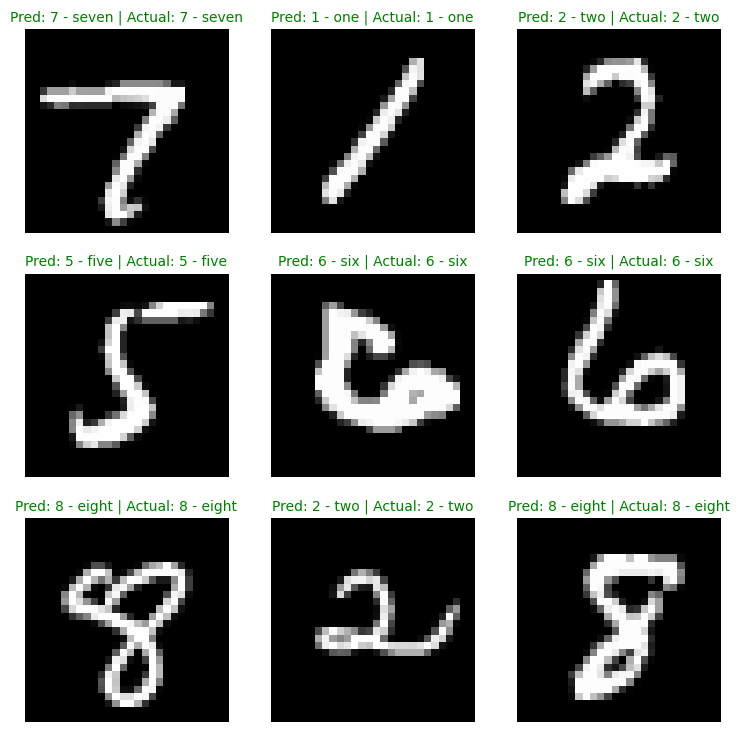

In [ ]:
# Plot more images
# torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")

  # Make a prediction
  new_img = img.to(device).unsqueeze(dim=0)

  test_pred_logits = model(new_img)
  test_pred_class = torch.argmax(test_pred_logits)

  if label == test_pred_class:
    plt.title(f"Pred: {class_names[test_pred_class]} | Actual: {class_names[label]}", fontsize=10, c="g")
  else:
    plt.title(f"Pred: {class_names[test_pred_class]} | Actual: {class_names[label]}", fontsize=10, c="r")

  plt.axis(False)